  
 ....reading fort.64 (LW)
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(8192, 3)
LW (128, 64)
  
 ....reading fort.65 (SW)
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
(8192, 3)
SW (128, 64)
******************************
Total Integrated Output (W):
  LW: 9.30006068364488e+17
  SW: 4.283258880894441e+17
 sum: 1.358331956453932e+18
-------------------------------
 Dayside Integrated Output (W):
  LW: 4.5774188908433517e+17
  SW: 2.108169377843055e+17
 sum: 6.685588268686406e+17
******************************


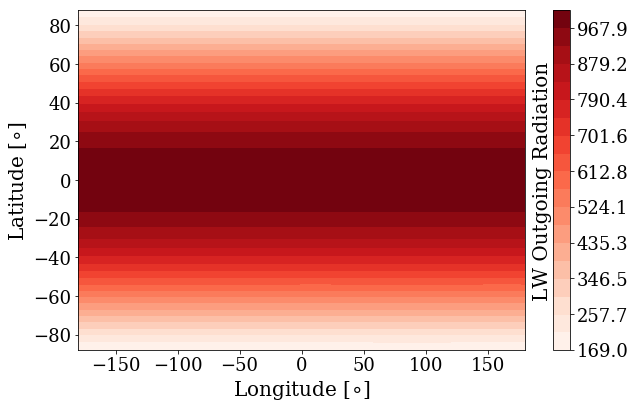

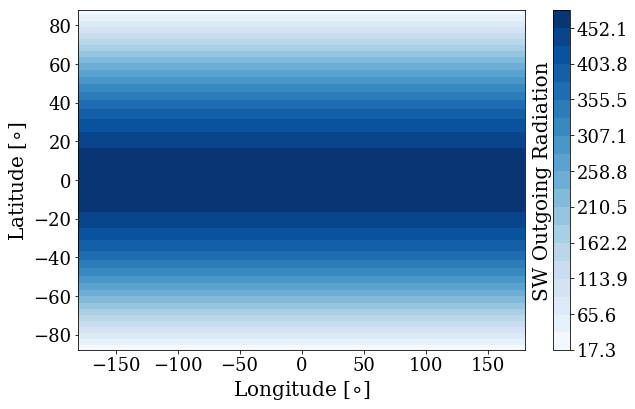

In [27]:
from igcm_olr_func import igcm_olr
%matplotlib inline

oom=0
p0=0.10
radea=9.56*10**6

#path='/Users/ermay/Desktop/GCM_plots/Files/'
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='FiducialPlanet/Model4/Test_New/'#L10/T42/P0_010'
makeplot=True
saveplot=True
LastOrb=False
savenamelw=path+runname+'/Model4_P0_010_lw.png'
savenamesw=path+runname+'/Model4_P0_010_sw.png'
both=True #true to plot SW and LW, False for only lW

data_lw,data_sw,total_lw,total_sw,lon_arr,lat_arr=igcm_olr(path,runname,oom,p0,radea,makeplot, saveplot,savenamelw,savenamesw, both,LastOrb)

import pickle
pickle.dump(total_lw, open(path+runname+'/LW_total.txt', 'wb'))
pickle.dump(total_sw, open(path+runname+'/SW_total.txt', 'wb'))

# read object from file
a = pickle.load(open(path+runname+'/LW_total.txt', 'rb'))
b = pickle.load(open(path+runname+'/SW_total.txt', 'rb'))


# Calculates incoming Radiation to Compare #


******************************
Total Integrated Input (W):
  SW: 1.5557159709971026e+18
 O/I: 87.31 %
******************************


Text(0.77,0.5,u'SW Incoming Radiation')

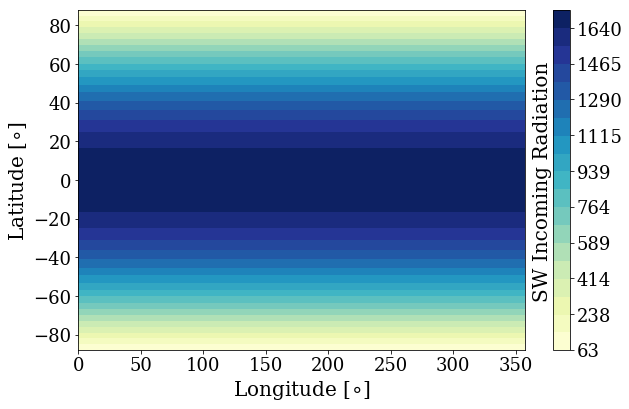

In [28]:
SOLC_IN=7680.  #input irradiation (fort.7)
TOA_ALB=0.3    #Top of Atmospher Albedo (fort.7)
radea=9.56*10**6

LDIUR=True      #Diurnal Average Logical Switch


#################################
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib.font_manager import FontProperties
params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)


nlon=len(lon_arr)
nlat=len(lat_arr)
irr_arr=np.empty([nlon,nlat])

SOLC=SOLC_IN*(1.0-TOA_ALB)/np.pi

for j in range(0,nlat):
    irr_arr[:,j]=SOLC*np.cos(lat_arr[j]*np.pi/180.)
    
##################
total_in=np.nansum(irr_arr[:,:]*np.cos(lat_arr*np.pi/180.))*(2*np.pi/nlon)*(np.pi/nlat)*radea**2.
print '******************************'
print 'Total Integrated Input (W):'
print '  SW:', total_in
print ' O/I:', np.round(100.*(np.nansum([total_sw,total_lw])/total_in),2),'%'
print '******************************'
    
plt.figure(2,figsize=(10,6.25))
LON,LAT=np.meshgrid(lon_arr,lat_arr)

cbar_levs=np.round_(np.linspace(np.nanmin(irr_arr)/1.01,np.nanmax(irr_arr)*1.01,20),2)

p=plt.contourf(LON,LAT,irr_arr.T,levels=cbar_levs,cmap=plt.cm.YlGnBu,zorder=0)
c=plt.colorbar(p)
c.ax.tick_params(labelsize=18)

plt.ylim(np.nanmin(lat_arr),np.nanmax(lat_arr))
plt.xlim(np.nanmin(lon_arr),np.nanmax(lon_arr))

plt.ylabel('Latitude [${\circ}$]',fontsize=20)
plt.xlabel('Longitude [${\circ}$]',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.figtext(0.77,0.5,'SW Incoming Radiation',
            fontsize=20,rotation='vertical',ha='center',va='center')


0.9224045733529744
